In [1]:
import pandas as pd
import seaborn as sns

In [2]:

df = pd.read_csv("C:/Users\SCIENCE/Documents/ratings.csv")
df.tail()

C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_9268\1077144575.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users\SCIENCE/Documents/ratings.csv")


,userId,movieId,rating,timestamp,original_title,overview
1048570,10656,1608,2.0,906755366,NaN,NaN
1048571,10656,1610,3.0,906755296,NaN,NaN
1048572,10656,1614,3.0,906754185,NaN,NaN
1048573,10656,1616,1.0,906755479,NaN,NaN
1048574,10656,1617,4.0,906832779,NaN,NaN


In [3]:
name = df[["userId", "movieId", "rating", "timestamp"]]
name

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
1048570,10656,1608,2.0,906755366
1048571,10656,1610,3.0,906755296
1048572,10656,1614,3.0,906754185
1048573,10656,1616,1.0,906755479


In [4]:
name.describe()

,userId,movieId,rating,timestamp
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.378787e+03,1.615889e+04,3.537035e+00,1.173062e+09
std,3.064842e+03,3.126738e+04,1.045203e+00,2.045385e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,8.255829e+08
25%,2.728000e+03,1.080000e+03,3.000000e+00,9.922286e+08
50%,5.383000e+03,2.642000e+03,3.500000e+00,1.159314e+09
75%,8.060000e+03,6.643000e+03,4.000000e+00,1.354659e+09
max,1.065600e+04,1.762710e+05,5.000000e+00,1.501822e+09


In [5]:
name = df[["original_title", "rating"]]
name

,original_title,rating
0,Toy Story,1.0
1,Jumanji,4.5
2,Grumpier Old Men,5.0
3,Waiting to Exhale,5.0
4,Father of the Bride Part II,5.0
...,...,...
1048570,NaN,2.0
1048571,NaN,3.0
1048572,NaN,3.0
1048573,NaN,1.0


In [6]:
ratings= pd.DataFrame(df.groupby("original_title")["rating"].mean())
ratings.tail()

,rating
original_title,
１リットルの涙,4.5
１３号待避線より その護送車を狙え,3.5
２０世紀少年< 第1章> 終わりの始まり,5.0
３－４Ｘ１０月,3.5
ＳＭガールズ セイバーマリオネットＲ,3.0


In [7]:
ratings["number_of_ratings"] = df.groupby("original_title")["rating"].count()
ratings

,rating,number_of_ratings
original_title,,
!Women Art Revolution,2.5,1
#1 Cheerleader Camp,4.5,1
#Horror,5.0,1
#Pellichoopulu,3.0,1
#SELFIEPARTY,4.0,1
...,...,...
１リットルの涙,4.5,1
１３号待避線より その護送車を狙え,3.5,1
２０世紀少年< 第1章> 終わりの始まり,5.0,1


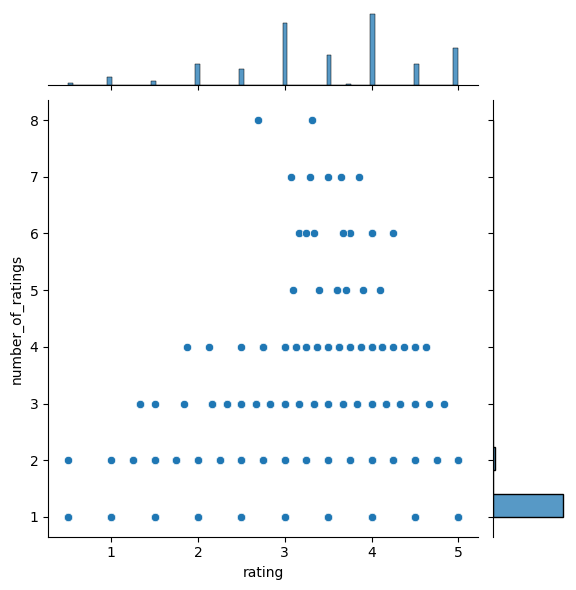

In [8]:
sns.jointplot(x="rating", y="number_of_ratings", data=ratings)

In [9]:
movie_matrix=df.pivot_table(index="userId", columns="original_title", values="rating")
movie_matrix

original_title,!Women Art Revolution,#1 Cheerleader Camp,#Horror,#Pellichoopulu,#SELFIEPARTY,#chicagoGirl,$ Dollars,$5 a Day,$50K and a Call Girl: A Love Story,$9.99,...,후궁: 제왕의 첩,후회하지 않아,龍在江湖,琉璃樽,０課の女 赤い手錠,１リットルの涙,１３号待避線より その護送車を狙え,２０世紀少年< 第1章> 終わりの始まり,３－４Ｘ１０月,ＳＭガールズ セイバーマリオネットＲ
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
ratings.sort_values("number_of_ratings", ascending=False)

,rating,number_of_ratings
original_title,,
Alice in Wonderland,2.687500,8
Hamlet,3.312500,8
Les Misérables,3.071429,7
A Christmas Carol,3.642857,7
The Three Musketeers,3.285714,7
...,...,...
If You Only Knew,5.000000,1
If You Were Young: Rage,5.000000,1
If a Man Answers,2.000000,1


In [11]:
Hamlet_user_rating=movie_matrix["Hamlet"]
similer_to_Hamlet=movie_matrix.corrwith(Hamlet_user_rating)
similer_to_Hamlet

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


original_title
!Women Art Revolution   NaN
#1 Cheerleader Camp     NaN
#Horror                 NaN
#Pellichoopulu          NaN
#SELFIEPARTY            NaN
                         ..
１リットルの涙                 NaN
１３号待避線より　その護送車を狙え       NaN
２０世紀少年< 第1章> 終わりの始まり    NaN
３－４Ｘ１０月                 NaN
ＳＭガールズ セイバーマリオネットＲ      NaN
Length: 43371, dtype: float64

In [13]:
corr_Hamlet = pd.DataFrame(similer_to_Hamlet, columns=["correlation"])
corr_Hamlet.dropna(inplace=True)
corr_Hamlet 

,correlation
original_title,
Backstage,-1.0
Conan the Barbarian,-1.0
Footloose,1.0
Hamlet,1.0
Les Misérables,1.0
Sleeping Beauty,1.0
The Avengers,1.0
The Thing,1.0
The Three Musketeers,-1.0


In [16]:
corr_Hamlet =corr_Hamlet .join(ratings["number_of_ratings"])
corr_Hamlet 

,correlation,number_of_ratings
original_title,,
Backstage,-1.0,2
Conan the Barbarian,-1.0,2
Footloose,1.0,2
Hamlet,1.0,8
Les Misérables,1.0,7
Sleeping Beauty,1.0,4
The Avengers,1.0,2
The Thing,1.0,2
The Three Musketeers,-1.0,7


In [19]:
corr_Hamlet[corr_Hamlet["number_of_ratings"]>3].sort_values(by="correlation", ascending=False)

,correlation,number_of_ratings
original_title,,
Hamlet,1.0,8
Les Misérables,1.0,7
Sleeping Beauty,1.0,4
The Three Musketeers,-1.0,7
